In [2]:
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K

In [3]:
# data preprocessing
# split test and train
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
num_classes = 10
# convert class vector to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# model design, cnn using relu and softmax act funcs, adadelta optimizer
batch_size = 128
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [5]:
# training model
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has been successfully trained")

Epoch 1/10
469/469 [==============================] - 119s 252ms/step - loss: 2.2785 - accuracy: 0.1452 - val_loss: 2.2266 - val_accuracy: 0.3650
Epoch 2/10
469/469 [==============================] - 117s 250ms/step - loss: 2.1937 - accuracy: 0.3174 - val_loss: 2.1236 - val_accuracy: 0.6327
Epoch 3/10
469/469 [==============================] - 118s 252ms/step - loss: 2.0838 - accuracy: 0.4610 - val_loss: 1.9820 - val_accuracy: 0.7376
Epoch 4/10
469/469 [==============================] - 118s 250ms/step - loss: 1.9301 - accuracy: 0.5529 - val_loss: 1.7825 - val_accuracy: 0.7732
Epoch 5/10
469/469 [==============================] - 116s 247ms/step - loss: 1.7255 - accuracy: 0.6115 - val_loss: 1.5268 - val_accuracy: 0.7917
Epoch 6/10
469/469 [==============================] - 117s 250ms/step - loss: 1.4900 - accuracy: 0.6497 - val_loss: 1.2583 - val_accuracy: 0.8037
Epoch 7/10
469/469 [==============================] - 116s 246ms/step - loss: 1.2678 - accuracy: 0.6820 - val_loss: 1.0294 -

Test loss: 0.6570484638214111
Test accuracy: 0.8510000109672546


<Axes: >

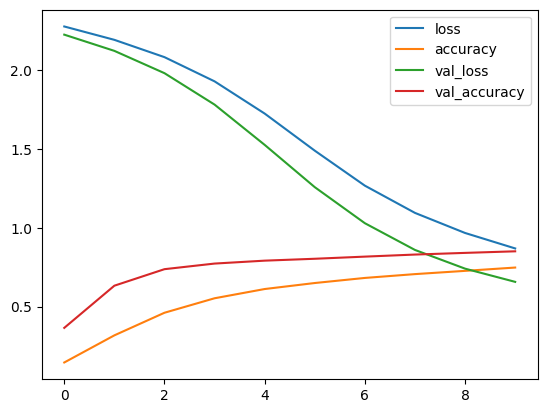

In [6]:
# loss and accuracy of model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
pd.DataFrame(hist.history).plot()